# RED ADALINE

## INTRODUCCION

La Red Adaline tiene una diferencia significativa con relación al Perceptrón ya que esta emplea  una regla de aprendizaje más fuerte que la del perceptrón que es la llamada regla LMS (Least Mean Square) mínimo cuadrado medio.
El perceptrón se basa en diferenciar de una clase de otra, separa por decirlo así manzana de peras, personas altas de bajas por decir un ejemplo, en cambio una red Adaline tiene una salida lineal y toma valores continuos que pueden ir de valores negativos hasta positivos.

![N|Solid](http://rasbt.github.io/mlxtend/user_guide/classifier/Adaline_files/adaline_schematic.png)

## CARACTERISTICAS

Las redes ADALINE son redes muy similares al perceptrón con la diferencia de que su función de activación es lineal en lugar de ser un limitador fuerte como es el caso del Perceptrón, estas presentan la misma limitación del Perceptrón respecto al tipo de problemas que pueden resolver,  ya que ambas redes solo pueden resolver problemas linealmente separables.
Son redes de aprendizaje supervisado que  usan la regla de Widrow–Hoff para dicho aprendizaje o también denominada regla Delta. El algoritmo que estas usan es el LMS (Least Mean Square) siendo este  más eficiente que la regla de aprendizaje del Perceptrón puesto que minimiza el error medio cuadrático.
Adaline está limitada a una única neurona de salida, un  vector x como su entrada y un número real y como su salida.

## DIFERENCIAS ENTRE ADALINE Y PERCEPTRON

| DIFERENCIAS | ADALINE | PERCEPTRON |
| --------- | --------- | --------- |
| FUNCION DE TRANSFERENCIA | LINEAL | ESCALON |
| RESOLUCION DE PROBLEMAS | LINEALMENTE SEPARABLES | LINEALMENTE SEPARABLES |
| COMPORTAMIENTO RESPECTO AL RUIDO | MINIMIZA EL RUIDO | SENSIBLE AL RUIDO |
| ALGORITMO DE APRENDIZAJE | LMS | REGLA DE APRENDIZAJE DEL PERCEPTRON |

![N|Solid](http://1.bp.blogspot.com/_9cXdFizPo1Y/TOrSXf_7ypI/AAAAAAAAAEY/Iql431fUAeg/s1600/adaline_percentron.png)

## ALGORITMO DE APRENDIZAJE

1. Inicializar los pesos en forma aleatoria
2. Introducir un patrón de entrada
3. Calcular la  salida (y), compararla con la deseada (d) y obtener la diferencia (dp - yp)
4. Multiplicar el resultado del paso anterior por la entrada correspondiente a cada uno de los pesos  y ponderarla por la tasa de aprendizaje.
5. Actualizar los pesos, sumando al valor antiguo la cantidad obtenida en el paso anterior
6. Si no se ha cumplido el criterio de parada, regresar al paso 2, si se ha acabado todos los  patrones repetir el algoritm

## EJEMPLO

In [35]:
import numpy as np
from numpy.random import seed
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [36]:
df = pd.read_csv('/home/carlos/Documentos/muestra.csv', header=None)

In [37]:
df.head()

,0,1,2,3,4
0,5.2,3.5,1.4,0.2,Iris-setosa
1,4.8,2.1,1.3,0.4,Iris-setosa
2,4.3,3.2,1.4,0.2,Iris-setosa
3,4.1,3.1,1.5,0.2,Iris-setosa
4,5.5,2.5,1.4,0.1,Iris-setosa


In [38]:
class AdalineGD(object):
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
       """Calculate net input"""
       return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
       """Compute linear activation"""
       return self.net_input(X)
    def predict(self, X):
       """Return class label after unit step"""
       return np.where(self.activation(X) >= 0.0, 1, -1)

/home/carlos/.conda/envs/cardosoSimulacion/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  


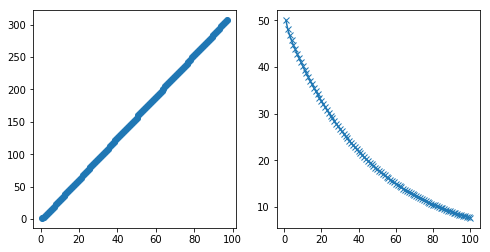

In [39]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
ada1 = AdalineGD(n_iter=100).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_) +1),np.log10(ada1.cost_),marker='o')

ada2 = AdalineGD(n_iter=100,eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_) +1), (ada2.cost_),marker='x')
plt.show()

In [40]:
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - X_std.mean() )/X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std.mean() )/X_std[:,1].std()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


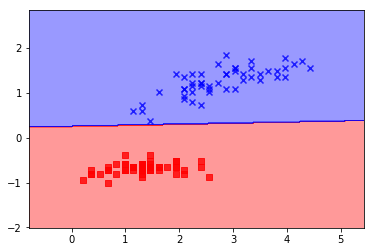

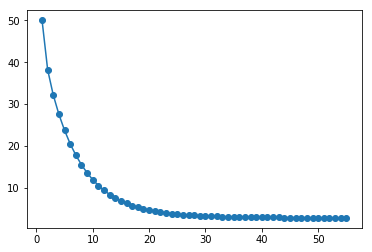

In [41]:
ada = AdalineGD(n_iter = 55,eta=0.001).fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada)
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.show()

## BIBLIOGRAFIA

1. Chavez, R. (21 de Noviembre de 2010). Modelos de Redes Neuronales. Obtenido de Red Adaline: http://ronaldchavezblog.blogspot.com/2010/11/red-adeline.html

2. Lopez, D. (30 de Junio de 2015). Inteligencia Artificial. Obtenido de Red Adaline: http://dianainteligenciaartificial.blogspot.com/2015/07/red-adaline.html

3. Medina, E; Cubides, H; Salazar, J y Sigüencia, J. 2010. Redes Adaline – Filtros Adaptativos. Disponible en: http://es.scribd.com/doc/52002261/Adeline-1